In [170]:
# Libraries
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import time

def gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, y, num_samples, burn_in):
    # Number of samples k
    k = num_samples
    
    # Storing vectors
    s_1 = np.zeros(burn_in+k)
    s_2 = np.zeros(burn_in+k)
    out = np.zeros(burn_in+k)
    
    # Set initial values
    s_1[0] = np.random.normal(mu_1, sigma_1)
    s_2[0] = np.random.normal(mu_2, sigma_2)
    
    for i in range(burn_in+k-1):
        mu_t = s_1[i] - s_2[i]
        if(y == 1):
            a, b = (0-mu_t)/sigma_t, np.infty
        else:
            a, b = -np.infty, (0-mu_t)/sigma_t
        # Calculate the output   
        out[i+1] = stats.truncnorm.rvs(a,b,mu_t,sigma_t)
        # Get sigma and Mu from the posterior to calculate the new prior
        Sigma = 1/(sigma_1+sigma_2+sigma_t)*np.matrix([[sigma_1*(sigma_2+sigma_t), sigma_1*sigma_2], \
                                                       [sigma_1*sigma_2, sigma_2*(sigma_1+sigma_t)]])
        Mu = np.matmul(Sigma, np.matrix([[mu_1/sigma_1+out[i+1]/sigma_t], [mu_2/sigma_2-out[i+1]/sigma_t]]))
        # Generate the new skills
        s_1[i+1], s_2[i+1] = np.random.multivariate_normal(list(Mu.flat), Sigma)
    
    # Discard burn-in samples
    s_1 = s_1[burn_in:-1]
    s_2 = s_2[burn_in:-1]
    
    return s_1, s_2, out

# Gibbs sampling, parameters
mu_BOTH = 50
sigma_BOTH = mu_BOTH/3
mu_1 = mu_BOTH
mu_2 = mu_BOTH
sigma_1 = sigma_BOTH
sigma_2 = sigma_BOTH
sigma_t = 10
y = 1
num_samples = 500
burn_in = 25

# Loop parameters
iterations = 20
elapsed_vec = np.zeros([iterations,1])
mu_approx_vec = np.zeros([iterations, 1])
sigma_approx_vec = np.zeros([iterations, 1])
to_plot = False

#fig, axs = plt.subplots(2, 2)
for i in range(iterations):
    # Do gibbs sampling
    t = time.time()
    s1,s2,out = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, y, num_samples, burn_in)
    elapsed = time.time() - t
    # print('Elapsed time for gibbs sampling: %f' % elapsed)

    # Histogram s1 
    hist_s1,bin_edges_s1 = np.histogram(s1, bins = 50, density=True)

    # Approx Gaussian s1
    mu_approx_s1 = np.mean(s1)
    var_approx_s1 = np.var(s1)
    sigma_approx_s1 = np.sqrt(var_approx_s1)

    # Histogram s2
    hist_s2,bin_edges_s2 = np.histogram(s2, bins = 50, density=True)

    # Approx Gaussian s2
    mu_approx_s2 = np.mean(s2)
    var_approx_s2 = np.var(s2)
    sigma_approx_s2 = np.sqrt(var_approx_s2)

    # Save data in iteration vectors
    elapsed_vec[i] = elapsed
    mu_approx_vec[i] = mu_approx_s1
    sigma_approx_vec[i] = sigma_approx_s1

    if to_plot:
        # Plot histogram and approximated Gaussian
        plt.figure(1, figsize=[10, 7])
        plt.bar(bin_edges_s1[:-1], hist_s1,width = 0.8, alpha=0.3, label='Samples s1')
        plt.bar(bin_edges_s2[:-1], hist_s2,width = 0.8, alpha=0.3, label='Samples s2')
        x_approx_s1 = np.linspace(mu_approx_s1 - 3*sigma_approx_s1, mu_approx_s1 + 3*sigma_approx_s1, 100)
        plt.plot(x_approx_s1, stats.norm.pdf(x_approx_s1, mu_approx_s1, sigma_approx_s1), label='Approx. Gaussian s1')
        x_approx_s2 = np.linspace(mu_approx_s2 - 3*sigma_approx_s2, mu_approx_s2 + 3*sigma_approx_s2, 100)
        plt.plot(x_approx_s2, stats.norm.pdf(x_approx_s2, mu_approx_s2, sigma_approx_s2), label='Approx. Gaussian s2')

        # Plot settings
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.title('n_samples = %d' % num_samples, fontsize=16)
        plt.ylabel('p(s)', fontsize=14)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout()

        # Show it
        plt.savefig('hist_with_gaussian_approx_%d.pdf' % (num_samples), format='pdf')
        plt.show()



In [106]:
# Error calculation
mu_approx_s1_50000 = 55.550150211678464
sigma_approx_s1_50000 = 4.98544352467772

elapsed_mean = np.mean(elapsed_vec)
mu_diff_mean = np.mean(np.abs(mu_approx_s1_50000 - mu_approx_vec))
sigma_diff_mean = np.mean(np.abs(sigma_approx_s1_50000 - sigma_approx_vec))

print('Samples = %d, elapsed time = %f, mu_diff = %f, sigma_diff = %f' % (num_samples, elapsed_mean, \
                                                                          mu_diff_mean, sigma_diff_mean))

t_50000 = 18.852215933799744

#t_5000 = 3.057931
#mu_diff_5000 = 0.085828
#sigma_diff_5000 = 0.056729
#
#t_500 = 0.273206
#mu_diff_500 = 0.284529
#sigma_diff_500 = 0.158460
#
#t_50 = 0.028684
#mu_diff_50 = 0.743876
#sigma_diff_50 = 0.467441

Samples = 50, elapsed time = 0.028684, mu_diff = 0.743876, sigma_diff = 0.467441


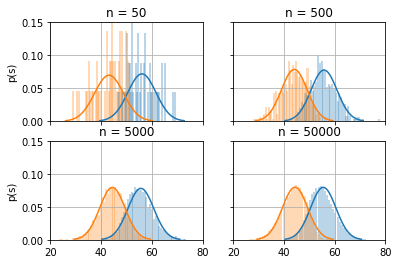

In [143]:
# Gibbs sampling, parameters
mu_BOTH = 50
sigma_BOTH = mu_BOTH/3
mu_1 = mu_BOTH
mu_2 = mu_BOTH
sigma_1 = sigma_BOTH
sigma_2 = sigma_BOTH
sigma_t = 10
y = 1
num_samples = [50, 500, 5000, 50000]
fig_inds = ((0,0), (0,1), (1,0), (1,1))
burn_in = 25

# Loop parameters
iterations = 20
elapsed_vec = np.zeros([iterations,1])
mu_approx_vec = np.zeros([iterations, 1])
sigma_approx_vec = np.zeros([iterations, 1])
to_plot = True

fig, axs = plt.subplots(2, 2)
i = 0
for n in num_samples:
    # Do gibbs sampling
    t = time.time()
    s1,s2,out = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, y, n, burn_in)
    elapsed = time.time() - t
    # print('Elapsed time for gibbs sampling: %f' % elapsed)

    # Histogram s1 
    hist_s1,bin_edges_s1 = np.histogram(s1, bins = 50, density=True)

    # Approx Gaussian s1
    mu_approx_s1 = np.mean(s1)
    var_approx_s1 = np.var(s1)
    sigma_approx_s1 = np.sqrt(var_approx_s1)

    # Histogram s2
    hist_s2,bin_edges_s2 = np.histogram(s2, bins = 50, density=True)

    # Approx Gaussian s2
    mu_approx_s2 = np.mean(s2)
    var_approx_s2 = np.var(s2)
    sigma_approx_s2 = np.sqrt(var_approx_s2)

    # Save data in iteration vectors
    elapsed_vec[i] = elapsed
    mu_approx_vec[i] = mu_approx_s1
    sigma_approx_vec[i] = sigma_approx_s1

    if to_plot:
        # Plot histogram and approximated Gaussian
        axs[fig_inds[i]].bar(bin_edges_s1[:-1], hist_s1,width = 0.8, alpha=0.3, label='Samples s1')
        axs[fig_inds[i]].bar(bin_edges_s2[:-1], hist_s2,width = 0.8, alpha=0.3, label='Samples s2')
        x_approx_s1 = np.linspace(mu_approx_s1 - 3*sigma_approx_s1, mu_approx_s1 + 3*sigma_approx_s1, 100)
        axs[fig_inds[i]].plot(x_approx_s1, stats.norm.pdf(x_approx_s1, mu_approx_s1, sigma_approx_s1), label='Approx. Gaussian s1')
        x_approx_s2 = np.linspace(mu_approx_s2 - 3*sigma_approx_s2, mu_approx_s2 + 3*sigma_approx_s2, 100)
        axs[fig_inds[i]].plot(x_approx_s2, stats.norm.pdf(x_approx_s2, mu_approx_s2, sigma_approx_s2), label='Approx. Gaussian s2')

        # Plot settings
        #axs[fig_inds[i]].legend(fontsize=12)
        axs[fig_inds[i]].grid(True)
        axs[fig_inds[i]].set_title('n = %d' % n)
    i += 1

# Show it
for ax in axs.flat:
    ax.set(ylabel='p(s)', ylim=[0, 0.15], xlim=[20,80])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('hists_with_gaussian_approx_alln.pdf', format='pdf')
plt.show()

In [2]:
fig_inds = ((0,0), (0,1), (1,0), (1,1))
fig_inds[0]

(0, 0)

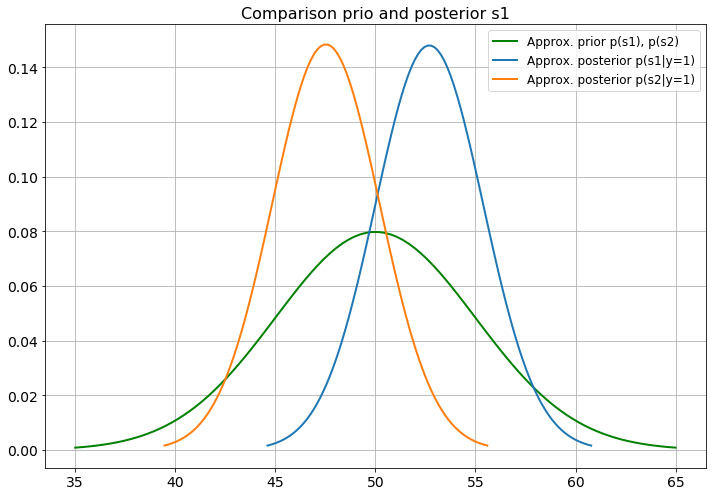

In [186]:
# Compare prior p(s1) and posterior p(s1|y=1) with Gaussian approx.

# Gibbs sampling, parameters
mu_BOTH = 50
sigma_BOTH = mu_BOTH/10
mu_1 = mu_BOTH
mu_2 = mu_BOTH
sigma_1 = sigma_BOTH
sigma_2 = sigma_BOTH
sigma_t = 10
y = 1
num_samples = 500
burn_in = 25

# Loop parameters
iterations = 1
elapsed_vec = np.zeros([iterations,1])
mu_approx_vec = np.zeros([iterations, 1])
sigma_approx_vec = np.zeros([iterations, 1])
to_plot = True

# Do gibbs sampling
s1,s2,out = gibbs_sampler(mu_1, mu_2, sigma_1, sigma_2, sigma_t, y, num_samples, burn_in)

# Approx posterior p(s1|y=1) Gaussian
mu_approx_s1 = np.mean(s1)
var_approx_s1 = np.var(s1)
sigma_approx_s1 = np.sqrt(var_approx_s1)

# Approx posterior p(s2|y=1) Gaussian
mu_approx_s2 = np.mean(s2)
var_approx_s2 = np.var(s2)
sigma_approx_s2 = np.sqrt(var_approx_s2)

if to_plot:
    # Plot histogram and approximated Gaussian s1
    plt.figure(1, figsize=[10, 7])
    x_s1 = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100)
    plt.plot(x_s1, stats.norm.pdf(x_s1, mu_1, sigma_1), label='Approx. prior p(s1), p(s2)', linewidth=2, color='green')
    
    x_ps1 = np.linspace(mu_approx_s1 - 3*sigma_approx_s1, mu_approx_s1 + 3*sigma_approx_s1, 100)
    plt.plot(x_ps1, stats.norm.pdf(x_ps1, mu_approx_s1, sigma_approx_s1), label='Approx. posterior p(s1|y=1)', linewidth=2)

    # Plot settings
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.title('Comparison prio and posterior s1', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()

    # Show it
    # plt.savefig('prior_posterior_Approx.pdf', format='pdf')
    # plt.show()
    
    # Plot histogram and approximated Gaussian s2
    # plt.figure(2, figsize=[10, 7])
    # x_s2 = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100)
    # plt.plot(x_s2, stats.norm.pdf(x_s2, mu_2, sigma_2), label='Approx. prior p(s2)', linewidth=2)
    
    x_ps2 = np.linspace(mu_approx_s2 - 3*sigma_approx_s2, mu_approx_s2 + 3*sigma_approx_s2, 100)
    plt.plot(x_ps2, stats.norm.pdf(x_ps2, mu_approx_s2, sigma_approx_s2), label='Approx. posterior p(s2|y=1)', linewidth=2)

    # Plot settings
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.title('Comparison prio and posterior s1', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()

    # Show it
    plt.savefig('prior_posterior_Approx.pdf', format='pdf')
    plt.show()

